In [ ]:
import numpy as np
from keras.datasets import mnist

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

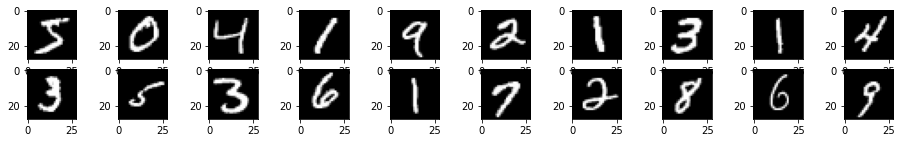

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 10, figsize=(16, 2))

count = 0

for i in range(2):
    for j in range(10):
        axes[i, j].imshow(X_train[count], cmap="gray")
        count+=1

In [ ]:
# Normalize Data
X_train = X_train/255
X_test = X_test/255

**Add Noise to Images**

**Prepare Source Data**

In [ ]:
noise_factor = 0.1

X_train_noise = X_train + noise_factor * np.random.normal(loc=0., scale=1., size=X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc=0., scale=1., size=X_test.shape)

In [ ]:
X_train_noise.shape

(60000, 28, 28)

**Visulaize Noisy Data**

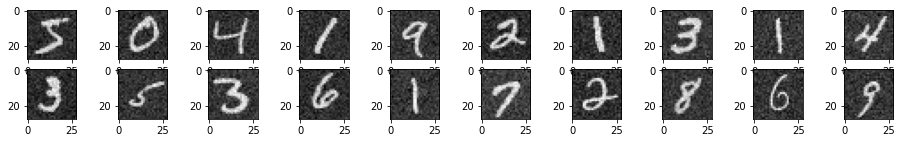

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(16, 2))

count = 0

for i in range(2):
    for j in range(10):
        axes[i, j].imshow(X_train_noise[count], cmap="gray")
        count+=1

**Reshape Data to 3D for CNN**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28, 28, 1)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28, 28, 1)

X_train.shape, X_train_noise.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

**Build Model**

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

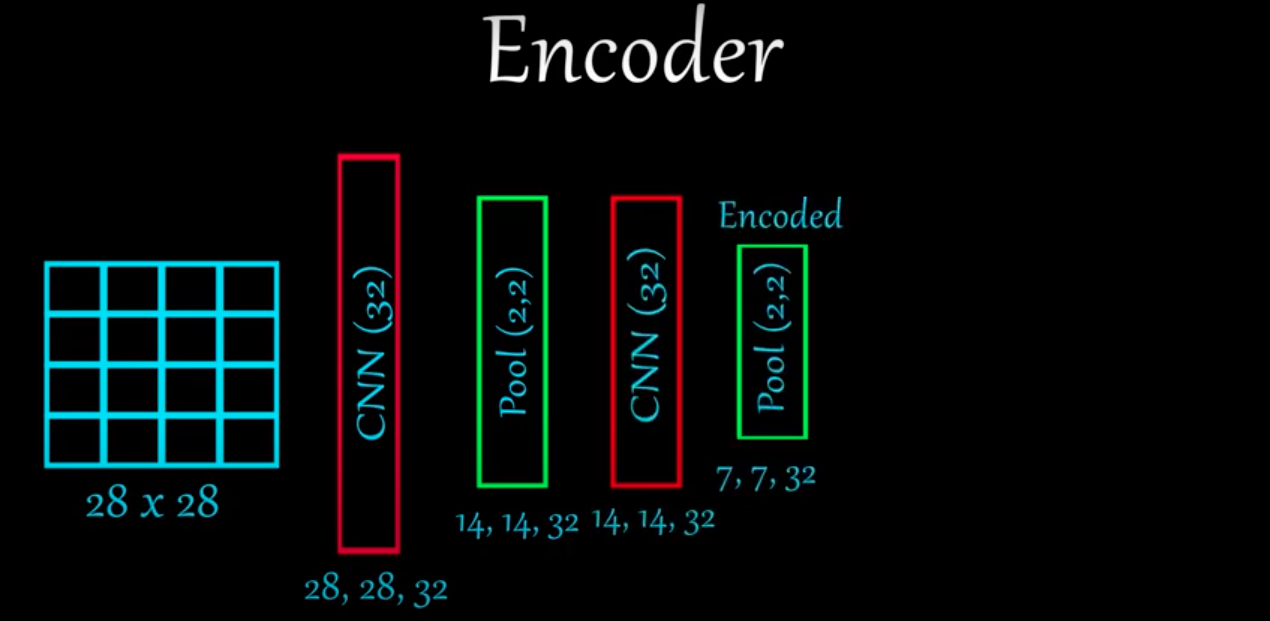

**Encoder**

In [ ]:
encoder_input = Input(shape = X_train.shape[1:])
x = Conv2D(32, (3, 3), activation="relu", padding="same")(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(pool_size=(2, 2), padding="same")(x)

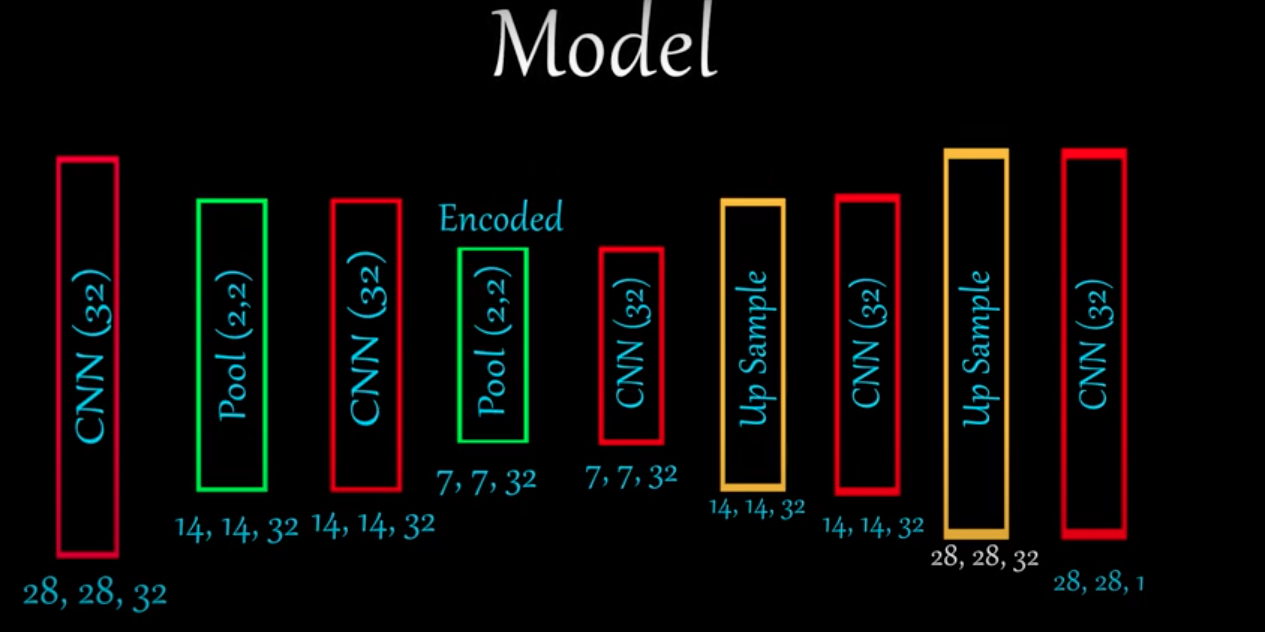

**Decoder**

In [ ]:
x = Conv2D(32, (3, 3), activation="relu", padding="same")(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

In [ ]:
autoencoder = Model(encoder_input, decoded, name = "Denoising_Model")
autoencoder.summary()

Model: "Denoising_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)      

In [ ]:
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

**Train Model**

In [ ]:
checkpoint = [ModelCheckpoint("denoising_model.h5", save_best_only=True, save_weights_only=False, verbose=1)]

In [ ]:
history = autoencoder.fit(X_train_noise, X_train, batch_size=128, epochs=50, callbacks=checkpoint, validation_split=0.25, verbose=2)

Epoch 1/50
352/352 - 131s - loss: 0.1623 - val_loss: 0.1376

Epoch 00001: val_loss improved from inf to 0.13757, saving model to denoising_model.h5
Epoch 2/50
352/352 - 130s - loss: 0.0766 - val_loss: 0.0762

Epoch 00002: val_loss improved from 0.13757 to 0.07625, saving model to denoising_model.h5
Epoch 3/50
352/352 - 131s - loss: 0.0736 - val_loss: 0.0735

Epoch 00003: val_loss improved from 0.07625 to 0.07346, saving model to denoising_model.h5
Epoch 4/50
352/352 - 132s - loss: 0.0722 - val_loss: 0.0722

Epoch 00004: val_loss improved from 0.07346 to 0.07218, saving model to denoising_model.h5
Epoch 5/50
352/352 - 131s - loss: 0.0713 - val_loss: 0.0762

Epoch 00005: val_loss did not improve from 0.07218
Epoch 6/50
352/352 - 130s - loss: 0.0706 - val_loss: 0.0712

Epoch 00006: val_loss improved from 0.07218 to 0.07119, saving model to denoising_model.h5
Epoch 7/50
352/352 - 129s - loss: 0.0700 - val_loss: 0.0705

Epoch 00007: val_loss improved from 0.07119 to 0.07046, saving model to

**Load Saved Model**

In [18]:
from keras.models import load_model
autoencoder = load_model("denoising_model.h5")
autoencoder.summary()

Model: "Denoising_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)      

In [24]:
def visualize_data(data, row, column):
  data = data.reshape(data.shape[0], 28, 28)
  count = 0
  fig, axes = plt.subplots(row, column, figsize=(16, 4))
  for i in range(row):
    for j in range(column):
      axes[i, j].imshow(data[count], cmap="gray")
      count += 1

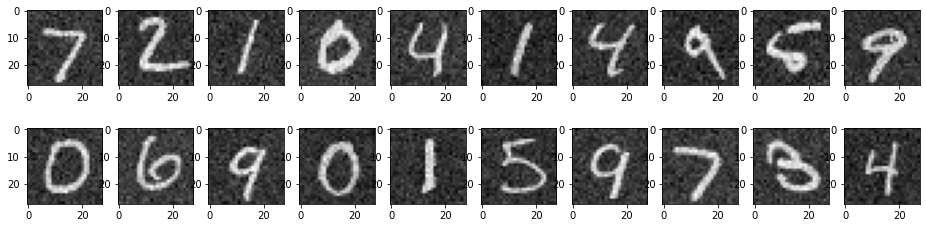

In [25]:
visualize_data(X_test_noise[:20], 2, 10)

In [26]:
pred = autoencoder.predict(X_test[:20])
pred.shape

(20, 28, 28, 1)

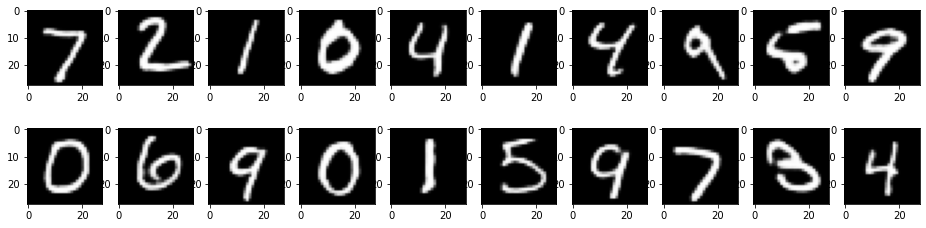

In [27]:
visualize_data(pred, 2, 10)